In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

# Google Play Store Dataset

**Column specifications**
  * **App**: Application name
  * **Category**: Category the app belongs to
  * **Rating**: Overall user rating of the app (as when scraped)
  * **Reviews**: Number of user reviews for the app (as when scraped)
  * **Size**: Size of the app (as when scraped)
  * **Installs**: Number of user downloads/installs for the app (as when scraped)
  * **Type**: Paid or Free 
  * **Price**: Price of the app (as when scraped)
  * **Content Rating**: Age group the app is targeted at - Children / Mature 21+ / Adult
  * **Genres**: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
  * **Last Updated**: Date when the app was last updated on Play Store (as when scraped)
  * **Current Ver**: Current version of the app available on Play Store (as when scraped)
  * **Android Ver**: Min required Android version (as when scraped)


## Load Dataset

In [2]:
data = pd.read_csv('googleplaystore.csv', parse_dates=["Last Updated"])

print(data.shape)
data.head(2)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


## Data Cleaning

### 1. Remove Duplicated rows

In [3]:
data.duplicated().sum()

483

In [4]:
data = data.drop_duplicates(keep='first')

print(data.shape)
data.head(2)

(10358, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


### 2. Remove rows with NA

In [5]:
print(data.isna().sum())

App                  0
Category             1
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [6]:
data = data.dropna()

print(data.shape)

(8886, 13)


### 3. Category 

Since "Category" is a categorical variable, this should be converted into a dummy variable.

In [7]:
category_name = data['Category'].unique()
print(category_name)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [8]:
category = data['Category'] 

le = LabelEncoder()
integer_encoded = le.fit_transform(category)

data["Category_int"] = integer_encoded

print(integer_encoded.shape)
print(integer_encoded)

(8886,)
[ 0  0  0 ... 11  3 18]


### 4. Convert 'Installs' dtype to integers

There are + signs and commas in the values of Installs column. This needs to be converted into integers.

In [9]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [10]:
def conv_sign_to_int(install):

    if '+' in install:
        install = install.replace('+','')
        install = install.replace(',','')
        
        return int(install)
    
    else:
        return 0

    return int(install)

data['Installs'] = data['Installs'].apply(conv_sign_to_int)

data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

### 5. Change all Size measurements to mb

There are kbyte values and mb values mixed in Size column. We need to unify them into one size measurement(mb).

In [11]:
# 1K = 10^(-3)M

def conv_k_into_m(kbyte):
    
    if pd.isnull(kbyte):
        return kbyte
    
    if 'k' in kbyte:
        kbyte = kbyte.replace('k','')
        
        return '{0:.2f}' .format(float(kbyte)*(10**-3))
    
    else:
        kbyte = kbyte.replace('M','')
        return kbyte                
    
    return kbyte

data['Size'] = data['Size'].apply(conv_k_into_m)
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0


In [12]:
# number of rows with Size value'Varies with device' 

(data['Size']=='Varies with device').sum()

1468

You can see that there are lots of rows with value 'Varied with device' in Size column.

### 6. Remove dollar sign in Price column

In [13]:
def conv_dollar_to_float(price):
    
    if pd.isnull(price):
        return price
       
    if '$' in price:
        price = price.replace('$','')
        return float(price)
    
    return int(price)

data['Price'] = data['Price'].apply(conv_dollar_to_float)

print(data.shape)
print(data['Price'].unique())
print(data['Price'].dtypes)

(8886, 14)
[  0.     4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99
   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99
  29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95
   4.49   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76
   4.84   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99
  18.99 389.99   8.49   1.75  14.     2.     3.08   2.59  19.4    3.9
   4.59  15.46   3.04  13.99   4.29   3.28   4.6    1.     2.95   2.9
   1.97   2.56   1.2 ]
float64


In [14]:
# Save cleaned data
data.to_csv('googleplay_modified_for_EDA.csv')

Now that we have clean data, we can work on EDA.

# EDA using seaborn

### Overall Distribution

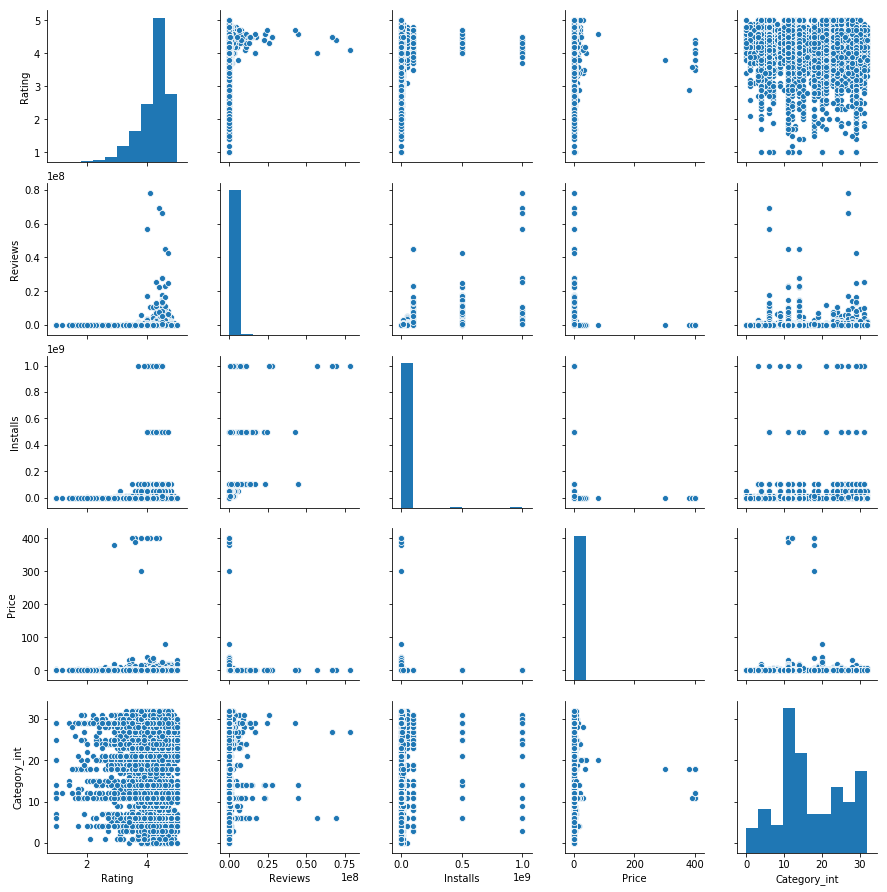

In [15]:
import seaborn as sns
sns.pairplot(data=data)

### Ratings

Let's dive more into Ratings column.

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


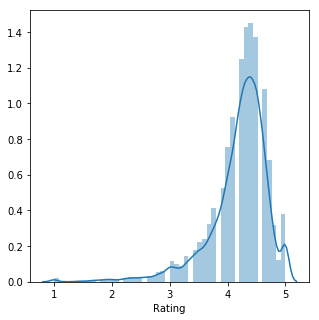

In [16]:
print(data['Rating'].describe())
plt.figure(figsize = (5,5))
sns.distplot(data['Rating'],bins=50,hist_kws={'alpha':0.4})

With this information, we can see:
* ratings are skewed left, so maybe it's a good idea to log-scale ratings.
* mean is 4.18
* some outliers lie below 2.0. 

## Checking Correlations between features

### 1) Category & Rating

In [17]:
category_list = list(data.Category.unique())
ratings =[]

for category in category_list:
    x = data[data.Category == category] 
    rating_avg = x.Rating.sum()/len(x)
    ratings.append(rating_avg)
    
data1 = pd.DataFrame({'Category':category_list, 'Rating':ratings})
new_index = (data1['Rating'].sort_values(ascending=False)).index.values
new_index
sorted_data = data1.reindex(new_index)

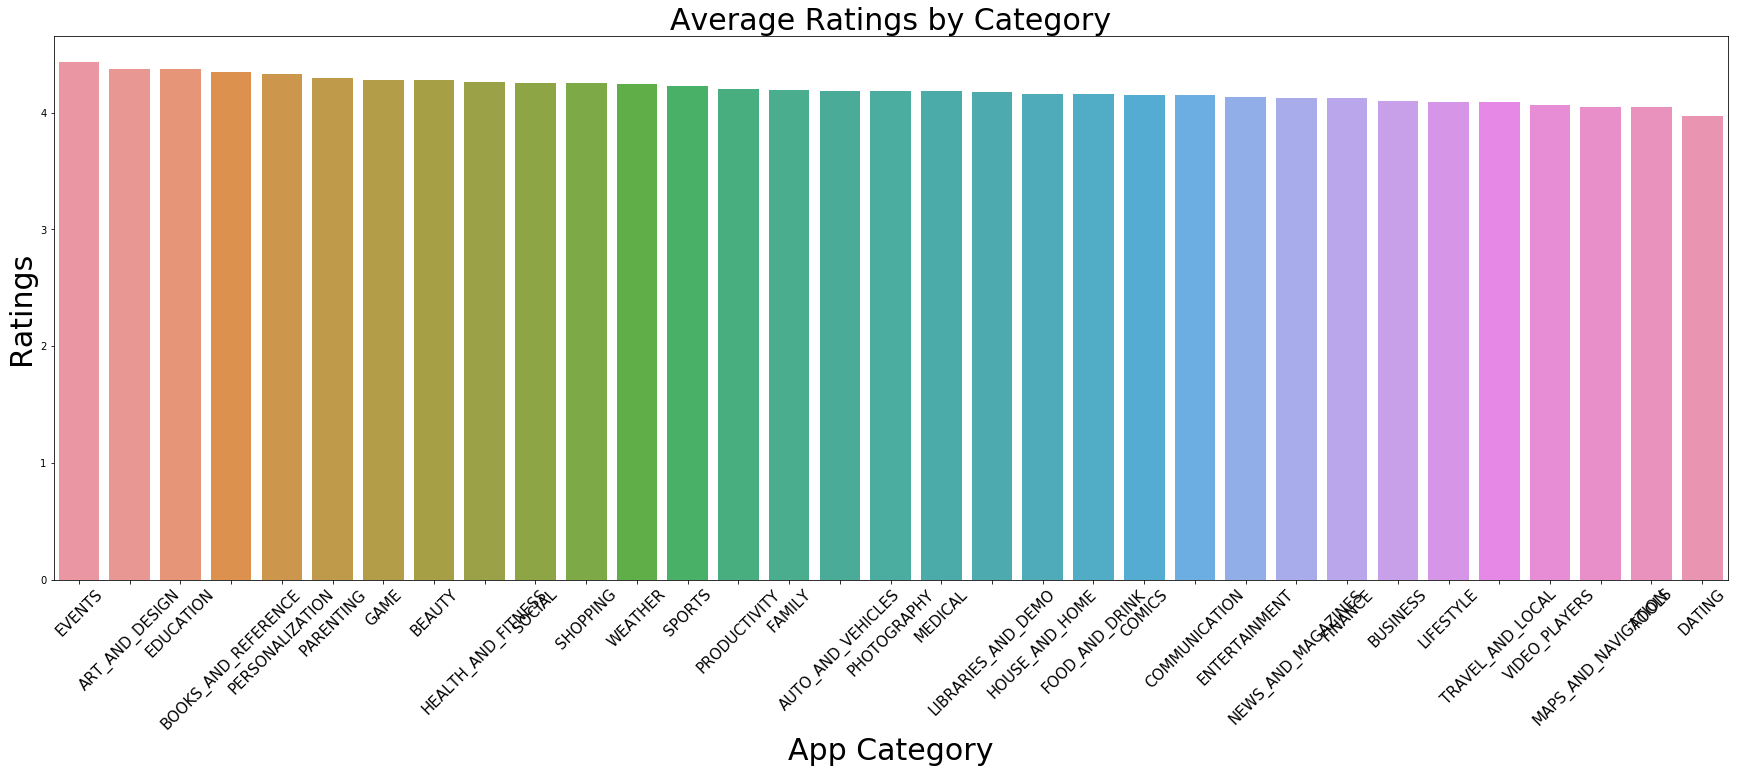

In [18]:
plt.figure(figsize = (30,10))
sns.barplot( x = sorted_data.Category, y = sorted_data.Rating )

plt.xticks(rotation = 45, fontsize=15)
plt.xlabel('App Category', fontsize=30)
plt.ylabel('Ratings', fontsize=30)
plt.title('Average Ratings by Category',fontsize=30)
plt.show()

With this information, we can see:
    
   * There's no big difference in average ratings per category.

### 2) Content Rating & Category

Let's see how 'content rating' is distributed over the categories

In [19]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [20]:
# list of categories
cat_list = list(data.Category.unique())

# content rating lists
everyone = []
teen = []
everyone_10 = []
mature_17 = []
adults_only_18 = []
unrated = []

# the function which fills category's (temp) content rating counts into lists
def insert_counts(everyone,teen,everyone_10,mature_17,adults_only_18,unrated,temp):
    try:
        everyone.append(temp.groupby('Content Rating').size()['Everyone'])
    except:
        eveyone.append(0)
        
    try:
        teen.append(temp.groupby('Content Rating').size()['Teen'])
    except:
        teen.append(0)
    
    try:
        everyone_10.append(temp.groupby('Content Rating').size()['Everyone 10+'])
    except:
        everyone_10.append(0)
        
    try:
        mature_17.append(temp.groupby('Content Rating').size()['Mature 17+'])
    except:
        mature_17.append(0)
        
    try:
        adults_only_18.append(temp.groupby('Content Rating').size()['Adults only 18+'])
    except:
        adults_only_18.append(0)
        
    try:
        unrated.append(temp.groupby('Content Rating').size()['Unrated'])
    except:
        unrated.append(0)

for cat in cat_list:
    temp = data[data.Category == cat]
    insert_counts(everyone,teen,everyone_10,mature_17,adults_only_18,unrated,temp)

Text(0.5, 1.0, 'Ratio of each content ratings per categories ')

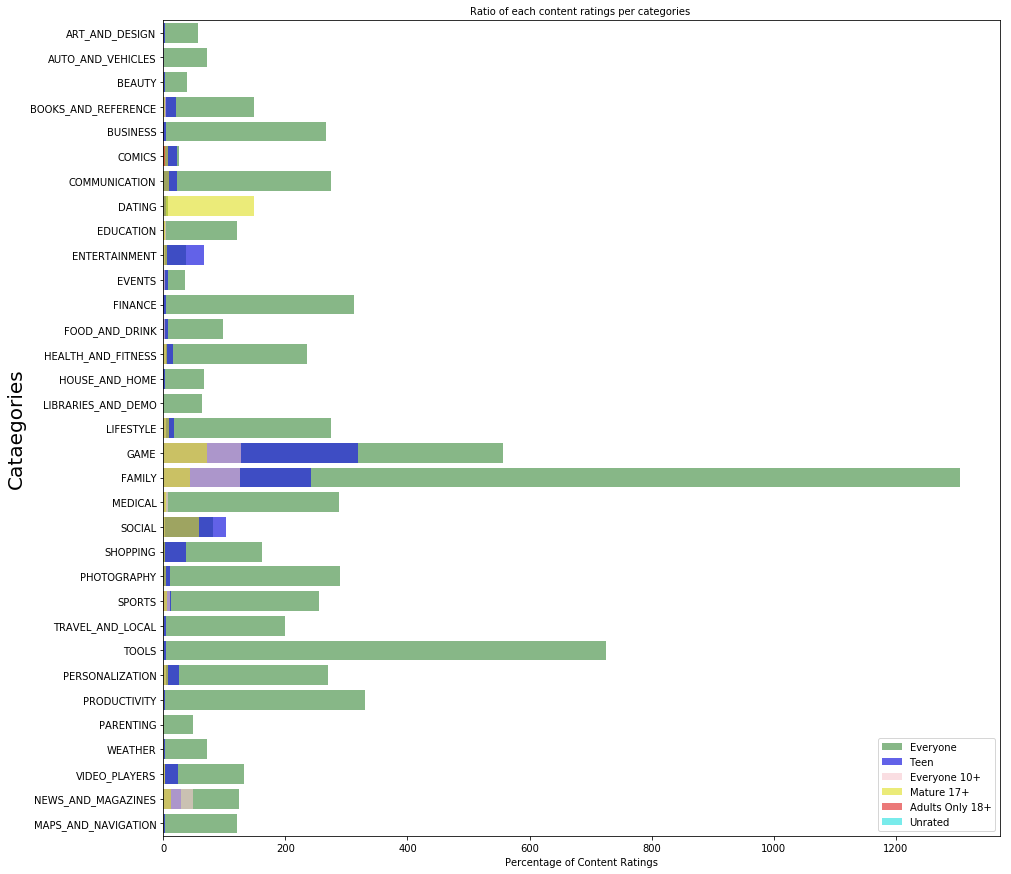

In [21]:
f, ax = plt.subplots(figsize = (15,15))

sns.barplot(x = everyone, y = cat_list, color = 'green', alpha = 0.5, label='Everyone')
sns.barplot(x = teen, y = cat_list, color= 'blue', alpha =0.7, label='Teen')
sns.barplot(x = everyone_10, y = cat_list, color = 'pink', alpha=0.6,label='Everyone 10+')
sns.barplot(x = mature_17,y=cat_list,color='yellow',alpha = 0.6,label='Mature 17+')
sns.barplot(x = adults_only_18,y=cat_list,color='red',alpha = 0.6,label='Adults Only 18+')
sns.barplot(x = unrated,y=cat_list,color='aqua',alpha = 0.6,label='Unrated')

ax.legend(loc = 'lower right',frameon = True, fontsize=10)
ax.tick_params(axis='both',which='major',labelsize=10)
ax.set_xlabel('Percentage of Content Ratings',fontsize=10)
ax.set_ylabel('Cataegories',fontsize=20)
ax.set_title('Ratio of each content ratings per categories ',fontsize=10)

With this information, we can see:

   * Except for the Dating category, most categories have high proportion of Everyone.

### 3) Android version & Rating

In [22]:
apps2 = data
apps2['Android Ver'].value_counts()

4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

Since most apps support 4.1 and up, I want to assume 'Varies w/ device' are 4.1 and up too.

In [23]:
apps2['Android Ver'][apps2['Android Ver']=='Varies with device'] = '4.1 and up'
apps2['Android_ver_int'] = apps2['Android Ver'].str[0:1].astype(int)
apps2['Android_ver_int'].value_counts()

C:\Users\hands\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


4    6780
2    1160
5     500
3     246
1     104
6      46
7      45
8       5
Name: Android_ver_int, dtype: int64

In [24]:
new_index2 = (apps2['Android_ver_int'].sort_values(ascending=False)).index.values
sorted_apps2 = apps2.reindex(new_index2)

sorted_apps2.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_int,Android_ver_int
4460,Theme Android P for LG G7 & V35,PERSONALIZATION,4.6,5,4.5,100,Paid,1.49,Everyone,Personalization,2018-07-07,1.1,8.0 and up,23,8
6582,My BP Lab,HEALTH_AND_FITNESS,2.6,186,25,10000,Free,0.00,Everyone,Health & Fitness,2018-05-19,1.1.0,8.0 and up,15,8
3240,Moto Suggestions ¢®Ea,TOOLS,4.6,308,4.3,1000000,Free,0.00,Everyone,Tools,2018-06-08,0.2.32,8.0 and up,29,8


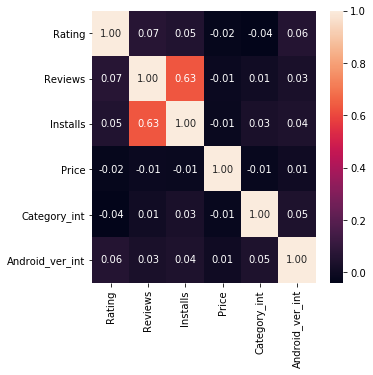

In [25]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(sorted_apps2.corr(), annot = True, fmt = '.2f',ax = ax)

* there is a weak correlation between rating and **minimum** android version.
* there is a weak correlation between rating and reviews
* to have more clear sight on correlation, let's plot them when grouped by categories.

In [26]:
df = apps2.groupby('Category').mean()
df = df.drop(['Reviews','Installs','Price','Category_int'],1)
df.sort_values('Rating',inplace=True)
df.head()

,Rating,Android_ver_int
Category,,
DATING,3.971698,4.037736
TOOLS,4.047203,3.686221
MAPS_AND_NAVIGATION,4.051613,3.895161
VIDEO_PLAYERS,4.063750,3.837500
TRAVEL_AND_LOCAL,4.094146,4.029268


In [27]:
df['Category'] = df.index

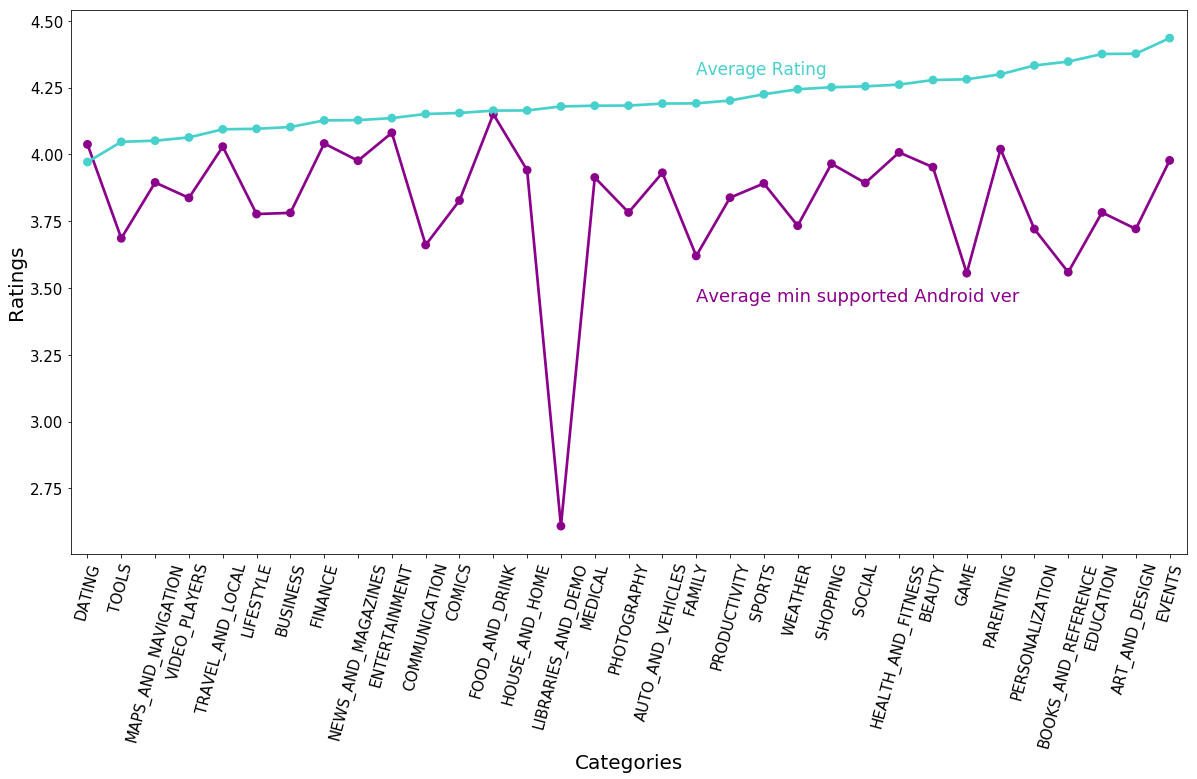

In [28]:
f, ax2 = plt.subplots(figsize = (20,10))
sns.pointplot(x = 'Category', y = 'Android_ver_int',data = df,color='darkmagenta',
             alpha = 0.8)
sns.pointplot(x = 'Category', y = 'Rating', data = df, color='mediumturquoise',
             alpha = 0.8)
plt.text(x=18, y=4.3, s= 'Average Rating', color='mediumturquoise', fontsize=17)
plt.text(x=18, y=3.45, s= 'Average min supported Android ver',
        color = 'darkmagenta', fontsize = 18)
plt.xlabel('Categories',fontsize = 20)
plt.ylabel('Ratings',fontsize = 20)
plt.tick_params(axis='x',rotation=75)
plt.tick_params(axis = 'both', labelsize =15)

* We can say that Rating and Android ver. are irrelevant

### 4) Content rating & Type on Ratings

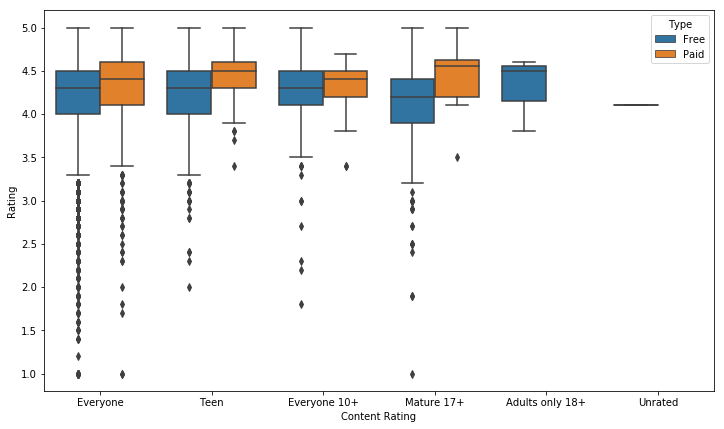

In [29]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=data)

* people tend to give high rating to apps when they pay for it.